In [1]:
import os
import pandas as pd
from cymr import models
from cymr import network
from cfr import framework
from psifr import fr

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'benchmark.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')

In [2]:
data = pd.read_csv(data_file)

## Generate simulated data

In [3]:
param = {'Afc': 0, 'Acf': 0, 'Aff': 0, 'Dff': 1, 
         'Lfc': .16, 'Lcf': .08, 'P1': .14, 'P2': 1.3,
         'B_enc': .75, 'B_start': .87, 'B_rec': .95, 'T': .10,
         'X1': .0078, 'X2': .26, 'Dfc': .84, 'Dcf': .92,
         'w_loc': .79, 'w_cat': .21, 'w_use': .2}

model = models.CMRDistributed()
wp = framework.model_variant(['loc', 'cat', 'use'], None)
patterns = network.load_patterns(patterns_file)

In [4]:
study_data = data.loc[(data['trial_type'] == 'study')]
sim = model.generate(study_data, param, None,
                     patterns=patterns, weights=wp.weights)

In [5]:
sim_merged = fr.merge_free_recall(sim, study_keys=['category'])
sim_merged

,subject,list,item,input,output,study,recall,repeat,intrusion,category
0,1,2,SEAN PENN,1,NaN,True,False,0,False,cel
1,1,2,AUDREY HEPBURN,2,9.0,True,True,0,False,cel
2,1,2,ST PATRICKS CATHEDRAL,3,NaN,True,False,0,False,loc
3,1,2,LES INVALIDES,4,NaN,True,False,0,False,loc
4,1,2,GREAT ZIMBABWE RUINS,5,15.0,True,True,0,False,loc
...,...,...,...,...,...,...,...,...,...,...
715,1,48,CHE GUEVARA,20,10.0,True,True,0,False,cel
716,1,48,OAHU BEACH,21,4.0,True,True,0,False,loc
717,1,48,GATEWAY ARCH,22,3.0,True,True,0,False,loc
718,1,48,WHITE HOUSE,23,2.0,True,True,0,False,loc


## Fit simulated data

In [6]:
results = model.fit_indiv(data, wp.fixed, wp.free, wp.dependent,
                          patterns=patterns, weights=wp.weights,
                          n_jobs=1, method='de', n_rep=1,
                          tol=0.001)

In [7]:
fit_param = results.loc[(1, 0)].to_dict()
fit = model.generate(study_data, fit_param, None,
                     patterns=patterns, weights=wp.weights)
fit_merged = fr.merge_free_recall(fit, study_keys=['category'])

## Plot results

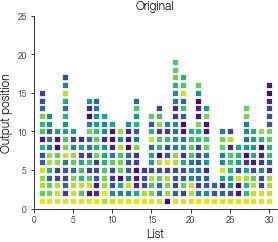

In [8]:
g = fr.plot_raster(fr.reset_list(sim_merged), length=4);
g.ax.set_title('Original');

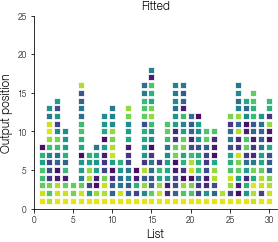

In [9]:
g = fr.plot_raster(fr.reset_list(fit_merged), length=4);
g.ax.set_title('Fitted');

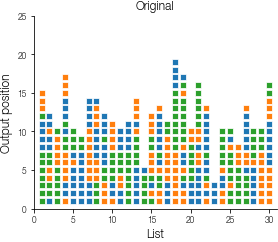

In [10]:
g = fr.plot_raster(fr.reset_list(sim_merged), hue='category', length=4);
g.ax.set_title('Original');

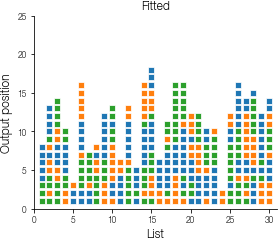

In [11]:
g = fr.plot_raster(fr.reset_list(fit_merged), hue='category', length=4);
g.ax.set_title('Fitted');

## Compare original and fitted parameters

In [12]:
results.loc[(1, 0)]
pd.DataFrame({'orig': pd.Series(param), 'fit': results.loc[(1, 0)]})

,orig,fit
Acf,0.0000,0.000000
Afc,0.0000,0.000000
Aff,0.0000,0.000000
B_enc,0.7500,0.739034
B_rec,0.9500,1.000000
B_start,0.8700,0.676402
Dcf,0.9200,0.859706
Dfc,0.8400,0.715030
Dff,1.0000,1.000000
Lcf,0.0800,0.140294
